<a href="https://colab.research.google.com/github/keyskull/COMPSCI-X433.3-Final-Project/blob/main/Introduction_python_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Project: Audio Analysis

#### Participants:  Jialin Li(Cullen), Alexa Huang

#### Date: 4/8/2021

#### Project Objective: 
- This project intended to analyze the speech audio files, using the specific packages such as NumPy, Scipy, and Pylab for plotting data to analyze audio file.
- Throught our learning about the audio data we did Up-Sampling, Down-Sampling to the audio data, and plotting data in Amplitude, Sound level(dB), and the specgram for the audio data.


### Data Source:
- From OpenSLR. OpenSLR is a site devoted to hosting speech and language resources, such as training corpora for speech recognition, and software related to speech recognition. 
- We used the data of LibriSpeech ASR corpus, Large-scale (1000 hours) corpus of read English speech from OpenSLR.

In [ ]:
!wget -O dev-clean.tar.gz https://www.openslr.org/resources/12/dev-clean.tar.gz
!tar -xvzf dev-clean.tar.gz

In [ ]:
!pip install samplerate

In [ ]:
import numpy as np
import scipy as sp
import pylab as plb
import soundfile as sf                                                      
from IPython.display import Audio
from scipy.io import wavfile
import seaborn as sns
import samplerate as spe

In [ ]:
# loading audio file
path = 'LibriSpeech/dev-clean/1272/128104/1272-128104-0000.flac'
data, samplerate = sf.read(path)
time = len(data)/samplerate    
print('Sample rate: %s Hz' % samplerate)    
print('Total time:',len(data)/samplerate,'s')     

Sample rate: 16000 Hz
Total time: 5.855 s


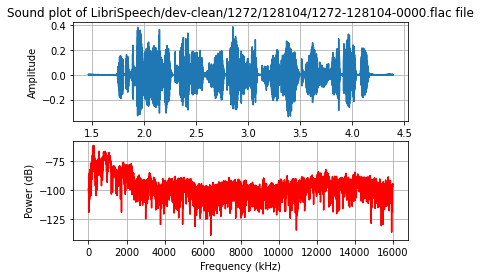

Orginal audio:


In [ ]:
time = len(data)/samplerate   
# Ploting data
t = plb.linspace(time/4,time/4*3,len(data))
plb.subplot(2,1,1)
plb.title('Sound plot of %s file' % path)
plb.plot(t,data)
plb.xlabel('time')
plb.ylabel('Amplitude')
plb.axis('tight')
plb.grid(True)

Freqs = np.arange(0,samplerate,2)
sig_pow = (abs(sp.fft.fft(data,samplerate)) / len(data)) ** 2
sig_pow= sig_pow[0:int(len(sig_pow)/2)]
plb.subplot(2,1,2)
plb.plot(Freqs,10*np.log10(sig_pow),color='r')
plb.xlabel('Frequency (kHz)')
plb.ylabel('Power (dB)')
plb.axis('tight')
plb.grid(True)
plb.show() 
print('Orginal audio:')
Audio(data,rate=samplerate)


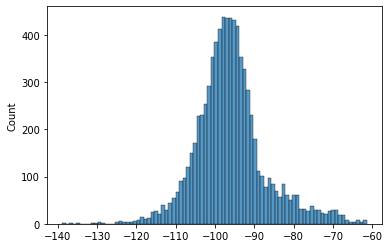

In [ ]:
sns.histplot(10*np.log10(sig_pow))

## Reverse order audio

In [ ]:
print('tenet audio')
Audio(np.flip(data),rate=samplerate)

tenet audio


In [ ]:
class TENET(Audio):
    
    def _repr_html_(self):
      return "<div style=\"transform:rotateY(180deg); width:300px\">"+super()._repr_html_()+"</div>"
    def __init__(self, data, **kwargs):
        return super().__init__(np.flip(data), **kwargs)
    

In [ ]:
TENET(data,rate=samplerate)

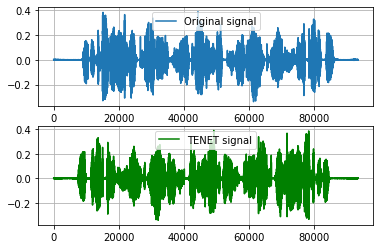

In [ ]:
plb.subplot(2,1,1)
plb.plot(data,label='Original signal')
plb.axis('tight')
plb.legend(loc='best')
plb.grid(True)
plb.subplot(2,1,2)
plb.plot(t,'g',label='TENET signal')
plb.axis('tight')
plb.legend(loc='best')
plb.grid(True)
plb.show()


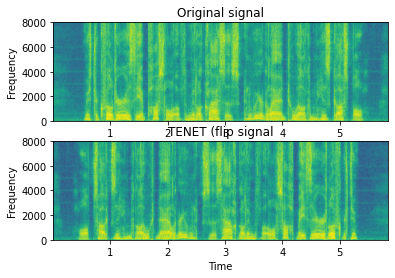

In [ ]:
plb.figure()
plb.subplot(2,1,1)
plb.specgram(data,Fs=samplerate)
plb.axis('tight')
plb.title('Original signal')
plb.ylabel('Frequency')
plb.subplot(2,1,2)
plb.specgram(t,Fs=samplerate)
plb.axis('tight')
plb.title('TENET (flip signal')
plb.xlabel('Time')
plb.ylabel('Frequency')
plb.show()

## Resampling


### Down-Sampling

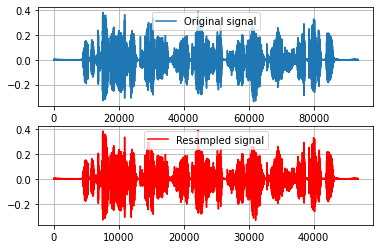

resampled audio


In [ ]:
F = samplerate / 2
F, s = F.as_integer_ratio()
x2= data[0:len(data):2]

plb.subplot(2,1,1)
plb.plot(data,label='Original signal')
plb.axis('tight')
plb.legend(loc='best')
plb.grid(True)
plb.subplot(2,1,2)
plb.plot(x2,'r',label='Resampled signal')
plb.axis('tight')
plb.legend(loc='best')
plb.grid(True)

plb.show()
print('resampled audio')
Audio(x2,rate=F)

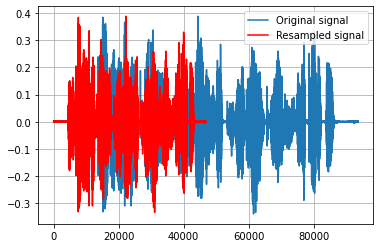

In [ ]:
plb.plot(data,label='Original signal')
plb.axis('tight')
plb.legend(loc='best')
plb.grid(True)
plb.plot(x2,'r',label='Resampled signal')
plb.axis('tight')
plb.legend(loc='best')
plb.grid(True)
plb.show()

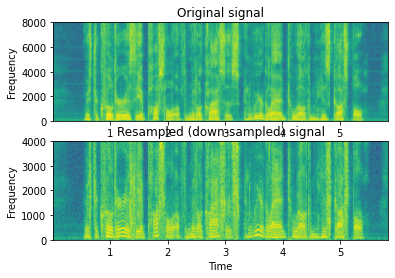

In [ ]:
plb.figure()
plb.subplot(2,1,1)
plb.specgram(data,Fs=samplerate)
plb.axis('tight')
plb.title('Original signal')
plb.ylabel('Frequency')
plb.subplot(2,1,2)
plb.specgram(x2,Fs=F)
plb.axis('tight')
plb.title('Resampled (down-sampled) signal')
plb.xlabel('Time')
plb.ylabel('Frequency')
plb.show()

### Up-Sampling

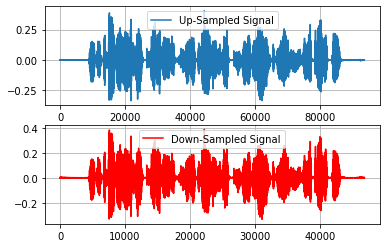

In [ ]:
# Up-sampling to down-sampling signal

## For this example, we see up-sampline cannot cannot recover origainal sound.

x3 =spe.resample(x2,2)
plb.subplot(2,1,1)
plb.plot(x3,label='Up-Sampled Signal')
plb.axis('tight')
plb.legend(loc='best')
plb.grid(True)
plb.subplot(2,1,2)
plb.plot(x2,'r',label='Down-Sampled Signal')
plb.axis('tight')
plb.legend(loc='best')
plb.grid(True)
plb.show()

Audio(x3,rate=samplerate)
## This shown we cannot recover origainal sound only using Up-Sampling method.

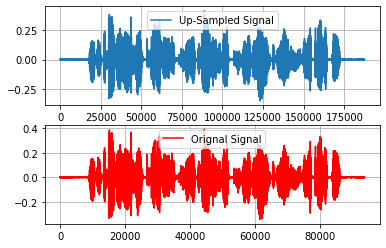

In [ ]:
# Up-sampling to orignal signal
x4 = spe.resample(data,2)
plb.subplot(2,1,1)
plb.plot(x4,label='Up-Sampled Signal')
plb.axis('tight')
plb.legend(loc='best')
plb.grid(True)
plb.subplot(2,1,2)
plb.plot(data,'r',label='Orignal Signal')
plb.axis('tight')
plb.legend(loc='best')
plb.grid(True)
plb.show()

Audio(x4,rate=samplerate*2)


## Audio Speed Changing

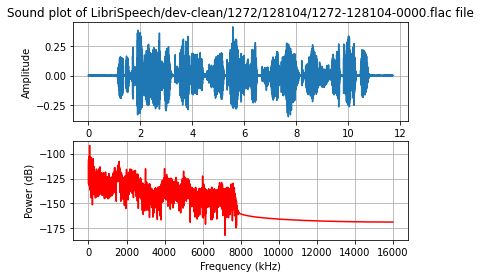

In [ ]:
# Ploting data
time = len(x4)/ samplerate
t = plb.linspace(0,time,len(x4))
plb.subplot(2,1,1)
plb.title('Sound plot of %s file' % path)
plb.plot(t,x4)
plb.xlabel('time')
plb.ylabel('Amplitude')
plb.axis('tight')
plb.grid(True)
Freqs = np.arange(0,samplerate,2)
sig_pow = (abs(sp.fft.fft(x4,samplerate)) / len(x4)) ** 2
sig_pow= sig_pow[0:int(len(sig_pow)/2)]
plb.subplot(2,1,2)
plb.plot(Freqs,10*np.log10(sig_pow),color='r')
plb.xlabel('Frequency (kHz)')
plb.ylabel('Power (dB)')
plb.axis('tight')
plb.grid(True)
plb.show()
# Speed down voice
Audio(x4,rate=samplerate)

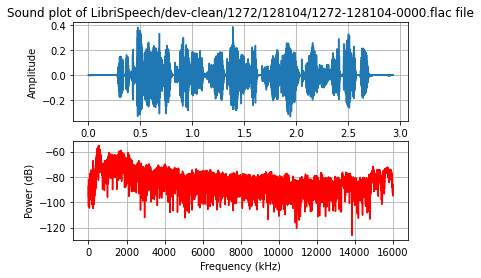

In [ ]:
# Speed up voice
# Ploting data
time = len(x2)/ samplerate
t = plb.linspace(0,time,len(x2))
plb.subplot(2,1,1)
plb.title('Sound plot of %s file' % path)
plb.plot(t,x2)
plb.xlabel('time')
plb.ylabel('Amplitude')
plb.axis('tight')
plb.grid(True)

Freqs = np.arange(0,samplerate,2)
sig_pow = (abs(sp.fft.fft(x2,samplerate)) / len(x2)) ** 2
sig_pow= sig_pow[0:int(len(sig_pow)/2)]
plb.subplot(2,1,2)
plb.plot(Freqs,10*np.log10(sig_pow),color='r')
plb.xlabel('Frequency (kHz)')
plb.ylabel('Power (dB)')
plb.axis('tight')
plb.grid(True)
plb.show()
Audio(x2,rate=samplerate)

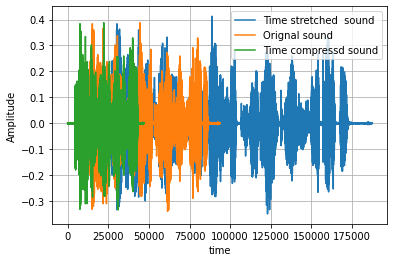

In [ ]:
## Three audio signals in one plot
plb.figure(3)
plb.plot(x4,label='Time stretched  sound')
plb.plot(data,label='Orignal sound')
plb.plot(x2,label='Time compressd sound')
plb.legend(loc='best')
plb.xlabel('time')
plb.ylabel('Amplitude')
plb.axis('tight')
plb.grid(True)

### Segmenting by words a speech audio (Tensorflow)

#### Might do it in the future